In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

In [ ]:
np.random.seed(42)

In [ ]:
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/fer_dataset_2.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Streaming output truncated to the last 5000 lines.
fer_dataset_2/dataset/sad/Training_81008287.jpg 2020-07-19 12:26:26         1218
fer_dataset_2/dataset/sad/Training_81013514.jpg 2020-07-19 12:26:26         1537
fer_dataset_2/dataset/sad/Training_81039583.jpg 2020-07-19 12:26:26         1767
fer_dataset_2/dataset/sad/Training_81048535.jpg 2020-07-19 12:26:26         1406
fer_dataset_2/dataset/sad/Training_81053420.jpg 2020-07-19 12:26:26         1254
fer_dataset_2/dataset/sad/Training_81075199.jpg 2020-07-19 12:26:26         1644
fer_dataset_2/dataset/sad/Training_81097657.jpg 2020-07-19 12:26:26         1673
fer_dataset_2/dataset/sad/Training_81101893.jpg 2020-07-19 12:26:26         1399
fer_dataset_2/dataset/sad/Training_81104314.jpg 2020-07-19 12:26:26         1664
fer_dataset_2/dataset/sad/Training_81116022.jpg 2020-07-19 12:26:26         1260
fer_dataset_2/dataset/sad/Training_81128509.jpg 2020-07-19 12:26:26         1525
fer_dataset_2/dataset/sad/Training_81161441.jpg 2020-07-19

In [ ]:
os.listdir('/content/fer_dataset_2')

['dataset']

In [ ]:
DATADIR = r'/content/fer_dataset_2/dataset'

In [ ]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES

['surprise', 'sad', 'neutral', 'angry', 'disgust', 'fear', 'happy']

In [ ]:
def load_data():
    DATADIR = r'/content/fer_dataset_2/dataset'
    data = []
    # loading training data
    for category in CATEGORIES:
        # create path to image of respective expression
        path = os.path.join(DATADIR, category)
        # get the classification  for each expression
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])

    return data

In [ ]:
data= load_data()

100%|██████████| 8989/8989 [00:00<00:00, 14138.53it/s]


In [ ]:
len(data)

35887

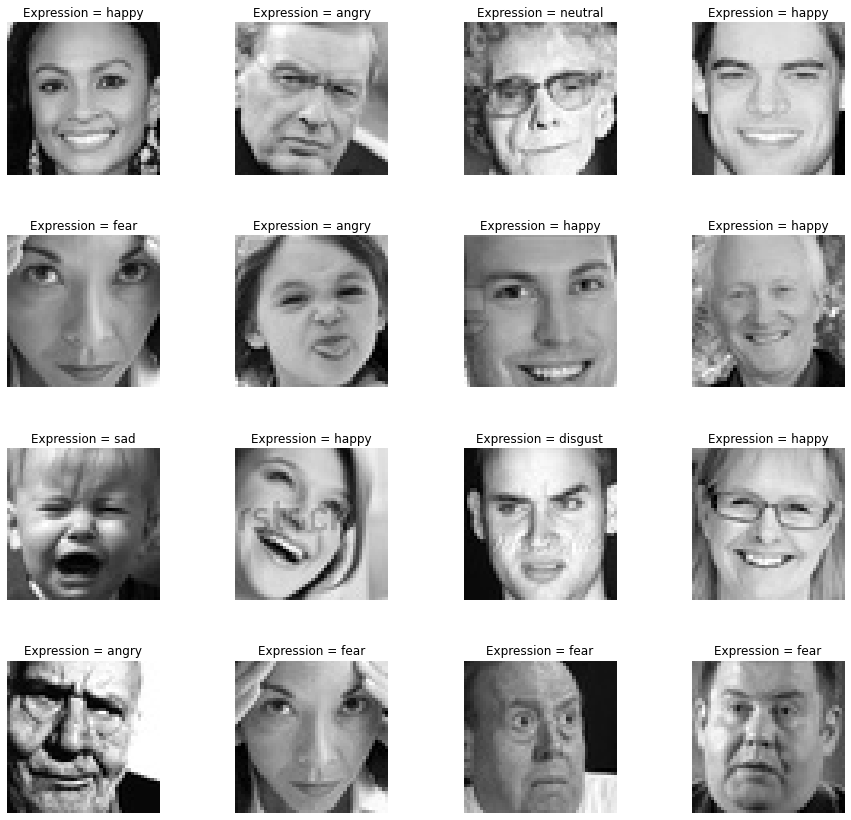

In [ ]:


L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in range(0, L * W):
    sample = random.choice(data)
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(sample[0], cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
X = np.array([ x[0] for x in data])
y = np.array([Y[1] for Y in data])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("-------------------------------")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (28709, 48, 48)
y_train shape:  (28709,)
-------------------------------
X_test shape:  (7178, 48, 48)
y_test shape:  (7178,)


In [ ]:
y_train = np.reshape(y_train, (len(y_train),1))
y_test  = np.reshape(y_test , (len(y_test ),1))

print("After reshaping")
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

After reshaping
y_train shape:  (28709, 1)
y_test shape:  (7178, 1)


In [ ]:
X_train_Gabor  = X_train
X_test_Gabor = X_test

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print("After adding color channel")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

After adding color channel
X_train shape:  (28709, 48, 48, 1)
X_test shape:  (7178, 48, 48, 1)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train[0]

array([3])

In [ ]:
y_train_SVM = y_train
y_test_SVM = y_test

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_train.shape, y_test.shape

((28709, 7), (7178, 7))

SIFT

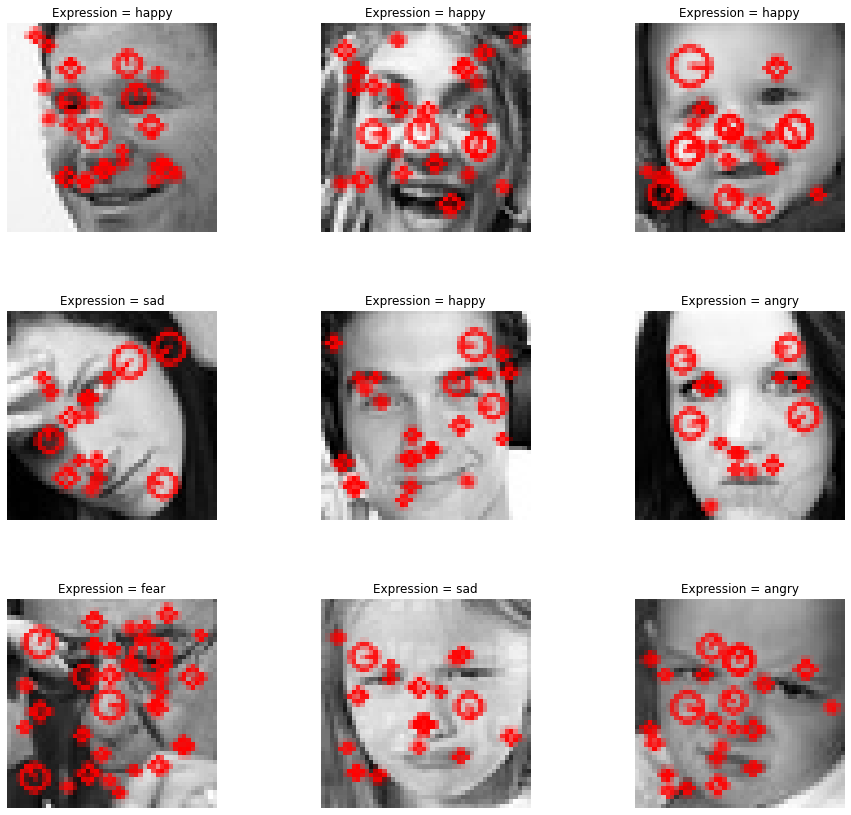

In [ ]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in range(0, L * W):
    sample = random.choice(data)
    image8bit = cv2.normalize(sample[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(image8bit,None)

    img = cv2.drawKeypoints(image=image8bit, outImage=sample[0], keypoints = kp, flags = 4, color = (255, 0, 0))
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)


In [ ]:
img.shape

(48, 48, 3)

In [ ]:
def create_SIFT_features(data):
    Feature_data = np.zeros((len(data),48,48,3))

    for i in range(len(data)):
        img = data[i]
        image8bit = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(image8bit,None)

        img = cv2.drawKeypoints(image=image8bit, outImage=img, keypoints = kp, flags = 4, color = (255, 0, 0))
        Feature_data[i] = img/255.0


    return Feature_data

In [ ]:
X_train_SIFT = create_SIFT_features(X_train)
X_train_SIFT.shape

(28709, 48, 48, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
X_train_SIFT = create_SIFT_features(X_train)
X_train_SIFT.shape

(28709, 48, 48, 3)

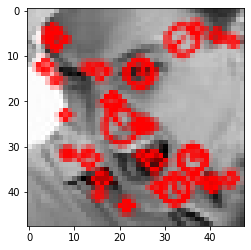

In [ ]:
plt.imshow(X_train_SIFT[0], cmap='gray')

In [ ]:
X_test_SIFT = create_SIFT_features(X_test)
X_test_SIFT.shape

(7178, 48, 48, 3)

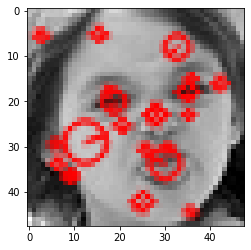

In [ ]:
plt.imshow(X_test_SIFT[0], cmap='gray')

In [ ]:
def create_model(input_shape=None):
    if input_shape is None :
        input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))
    def compute_output_shape(self, input_shape):
      return [(None, out_shape)]

    return model

In [ ]:
SIFT_model = create_model(input_shape=(48,48,3))
SIFT_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )
SIFT_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
y_train

array([3, 6, 1, ..., 2, 0, 2])